In [121]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import io

In [ ]:
!uvicorn my_api_backend_code:my_app --reload

In [2]:
requests.get('http://127.0.0.1:8000').content

b'{"message":"Hello World"}'

In [3]:
requests.get('http://127.0.0.1:8000/test').content

b'{"message":"This is a test"}'

In [4]:
requests.get('http://127.0.0.1:8000/increment/2').content

b'{"New value":3}'

In [5]:
requests.get('http://127.0.0.1:8000/increment/a').content

b'{"detail":[{"loc":["path","int1"],"msg":"value is not a valid integer","type":"type_error.integer"}]}'

In [6]:
requests.get('http://127.0.0.1:8000/increment/a').content

b'{"detail":[{"loc":["path","int1"],"msg":"value is not a valid integer","type":"type_error.integer"}]}'

In [7]:
files = {"car": ("cars.jpg", open("../images/cars.jpg", "rb"), "image/jpg"),
         "dip": ("dip.jpg", open("../images/dip.jpg", "rb"), "image/jpg")}
res = requests.post("http://localhost:8000/files", files=files)
print(res.content)

b'{"detail":[{"loc":["body","avatar"],"msg":"field required","type":"value_error.missing"},{"loc":["body","banner"],"msg":"field required","type":"value_error.missing"}]}'


In [ ]:
!ls ../images

In [11]:
# Possible image shapes for NOVIGA webcam
WIDTH, HEIGHT = [(640, 360), (640, 480), (800, 600), (1280, 720), (1280, 960)][1]
WIDTH, HEIGHT

(640, 480)

In [10]:
# prepare headers for http request
content_type = 'image/jpeg'
headers = {'content-type': content_type}

In [152]:
# open camera and configure it
cap = cv2.VideoCapture(0)
cap.set(3, WIDTH)
cap.set(4, HEIGHT)

True

In [153]:
# capture frame
ret, bgr_frame_i = cap.read()

In [154]:
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

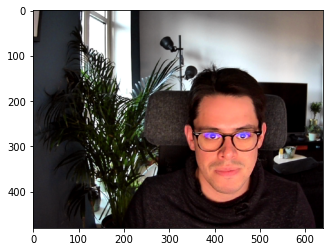

In [155]:
# plot image with detected objects
plt.imshow(cv2.cvtColor(bgr_frame_i, cv2.COLOR_BGR2RGB))

In [156]:
bgr_frame_i.shape

(480, 640, 3)

In [157]:
# encode image as jpeg
_, img_encoded = cv2.imencode('.jpg', bgr_frame_i)

In [42]:
# send http request with image and receive response
response = requests.post(r'http://127.0.0.1:8000/image_detection', data=img_encoded.tobytes(), headers=headers)

In [47]:
response.content

b'{"detail":[{"loc":["body","binary_file"],"msg":"field required","type":"value_error.missing"}]}'

In [57]:
# send http request with image and receive response
response = requests.post(r'http://127.0.0.1:8000/items', json={'img_name': 'name of this image', 'description': 'imagen png', 'price': 4})
response.content

b'"name of this image"'

In [67]:
# send http request with image and receive response
f = {'my_file': open("../images/cars.jpg", "rb")}
response = requests.post(r'http://127.0.0.1:8000/img_file', files=f)
response.content

b'1'

In [158]:
# send http request with image and receive response
f = {'my_file': img_encoded.tobytes()}
response = requests.post(r'http://127.0.0.1:8000/img_file', files=f)
response.content

b'1'

In [159]:
# send http request with image and receive response
f = {'binary_file': img_encoded.tobytes()}
response = requests.post(r'http://127.0.0.1:8000/send_img', files=f)
res = response.content

In [160]:
array_received = np.frombuffer(res, np.uint8)
array_received[:10]

array([134, 139, 154, 135, 138, 153, 137, 138, 152, 139], dtype=uint8)

In [161]:
img_bgr_received = array_received.reshape(bgr_frame_i.shape)

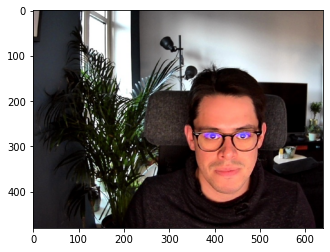

In [168]:
plt.imshow(cv2.cvtColor(img_bgr_received, cv2.COLOR_BGR2RGB))

In [163]:
img_bgr_received[:2]

array([[[134, 139, 154],
        [135, 138, 153],
        [137, 138, 152],
        ...,
        [ 96, 113, 132],
        [ 95, 112, 131],
        [ 96, 113, 132]],

       [[133, 138, 153],
        [135, 138, 153],
        [138, 139, 153],
        ...,
        [ 97, 114, 133],
        [ 94, 111, 130],
        [ 97, 114, 133]]], dtype=uint8)

In [164]:
bgr_frame_i[:2]

array([[[136, 137, 155],
        [136, 137, 153],
        [137, 138, 156],
        ...,
        [ 95, 113, 131],
        [ 94, 113, 131],
        [ 98, 113, 131]],

       [[136, 137, 155],
        [136, 137, 153],
        [137, 138, 156],
        ...,
        [ 96, 114, 132],
        [ 94, 113, 131],
        [ 99, 114, 132]]], dtype=uint8)

In [169]:
bgr_frame_i - img_bgr_received

array([[[  2, 254,   1],
        [  1, 255,   0],
        [  0,   0,   4],
        ...,
        [255,   0, 255],
        [255,   1,   0],
        [  2,   0, 255]],

       [[  3, 255,   2],
        [  1, 255,   0],
        [255, 255,   3],
        ...,
        [255,   0, 255],
        [  0,   2,   1],
        [  2,   0, 255]],

       [[  3,   0, 255],
        [  0, 255, 253],
        [254, 255, 255],
        ...,
        [255, 254, 255],
        [  0,   1,   2],
        [  5, 254,   2]],

       ...,

       [[  2,   1,   1],
        [  0,   0, 255],
        [  2,   1,   2],
        ...,
        [255,   0,   1],
        [255,   0,   0],
        [255,   0,   1]],

       [[  1, 255,   1],
        [255, 254,   0],
        [  3, 255,   1],
        ...,
        [  0,   0,   1],
        [  0,   0,   0],
        [255,   0,   0]],

       [[  1, 255,   1],
        [  1, 255,   1],
        [  3, 255,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [255,   0,   0]]

In [89]:
img_received = cv2.imdecode(array_received, cv2.IMREAD_COLOR)

In [103]:
img_encoded

array([[255],
       [216],
       [255],
       ...,
       [ 73],
       [255],
       [217]], dtype=uint8)

In [104]:
array_received

array([164, 163, 165, ...,  36,  28,  35], dtype=uint8)

In [90]:
img_received

In [46]:
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}
header['Content-Type'] = 'multipart/form-data'
payload = {'file': ('Image.jpg', img_encoded.tobytes(), 'image/jpeg') }

requests.post(r'http://127.0.0.1:8000/image_detection', files=payload, headers=headers)

<Response [422]>

In [ ]:
header = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}
header['Content-Type'] = 'multipart/form-data'
files = {'file': ('Image.jpg', img_encoded.tobytes(), 'image/jpeg', {'Expires': '10'}) }
res = requests.post('https://pasteboard.co/upload', files=files)

In [52]:
type(img_encoded.tobytes())

bytes